In [3]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


## **Problem 1**

Range - Kutta Integrator Protoptype

The Function being integrated here is
$$ dy/dx = y / 1 + x^2       $$     

The analytical solution is calculated using variable separation method.
$$ dy/y = dx / 1 + x^2       $$  
Integrating the above equation gives,

$$ ln(y) = tan^{-1}(x) + c $$

$$ y = e^{tan^{-1}(x)} * c $$

From the given initial condition where $ y(-20) = 1 $ 

$$ 1 = e^{tan^{-1}(-20)} * c $$

Hence, $ c = 4.58 $

The error is  0.007861334291120374
 The Total Number of Function Evaluations is  800
 The Number of Function Evaluation per step is  4.0


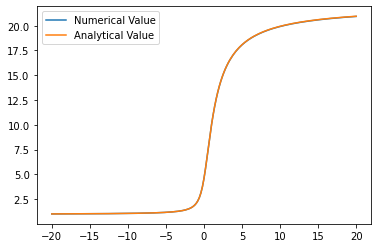

In [31]:
import math
import numpy as np
from matplotlib import pyplot as plt

funeval = 0

# Integrating Function
def fun(x,y):
  global funeval
  dydx = y / (1+(x**2))
  funeval = funeval + 1
  return dydx

# The Range - Kutta Integration setup
def rk4_step(f,x,y,h):
  
  k1=f(x,y)*h
  k2=h*f(x+h/2,y+k1/2)
  k3=h*f(x+h/2,y+k2/2)
  k4=h*f(x+h,y+k3)
  dy=(k1+2*k2+2*k3+k4)/6
  return dy

x=np.linspace(-20,20,201)
y=np.zeros(len(x))
y[0] = 1         # Setting y(-20) = 1

for i in range(len(x)-1):
    h = x[i+1]-x[i]
    y[i+1] = y[i] + rk4_step(fun,x[i],y[i],h)

# The Analytical Solution
c = 4.58
y_pred = []
for i in x:
  y_pred.append(np.exp(math.atan(i)) * c)

print('The error is ',np.std(y_pred-y))
print(' The Total Number of Function Evaluations is ', funeval)
print(' The Number of Function Evaluation per step is ', funeval/(len(x)-1))

plt.plot(x,y,label='Numerical Value')
plt.plot(x,y_pred,label='Analytical Value')
plt.legend()
plt.show()

The error is  0.005604218275467684
 The Number of Function Evaluation are  804
 The Number of Function Evaluation per step is  12.0


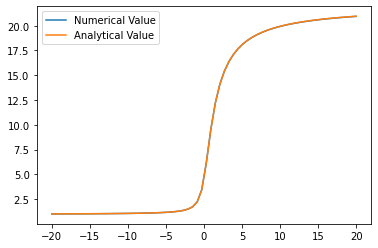

In [34]:
# Here, we take two half-size steps with Fourth order and combine to cancel leading error term.

import math
import numpy as np
from matplotlib import pyplot as plt

funeval = 0

# Integrating Function
def fun(x,y):
  global funeval
  dydx = y / (1+(x**2))
  funeval = funeval + 1
  return dydx


def rk4_stepd(fun,x,y,h):
  y1  = rk4_step(fun,x,y,h)

  y2a = rk4_step(fun,x,y,h/2)
  y2b = rk4_step(fun,x+h/2,y+y2a,h/2)

  return (4*(y2a+y2b)-y1)/3

x=np.linspace(-20,20,68)
h=np.median(np.diff(x))
y=np.zeros(len(x))
y[0]=1              # Setting y(-20) = 1

for i in range(len(x)-1):
    y[i+1]= y[i] + rk4_stepd(fun,x[i],y[i],h)

c = 4.58
y_pred = []
for i in x:
  y_pred.append(np.exp(math.atan(i))*c)

print('The error is ',np.std(y_pred-y))
print(' The Number of Function Evaluation are ', funeval)
print(' The Number of Function Evaluation per step is ', funeval/(len(x)-1))

plt.plot(x,y,label='Numerical Value')
plt.plot(x,y_pred,label='Analytical Value')
plt.legend()
plt.show()

The number of function evaluations for the $1^{st}$ method is $800$. With $200$ steps, the number of function evaluations for the $2^{nd}$ method goes to $2388$.

 In order to match the number of function evaluation for the $2^{nd}$ method, the length of $x$ (i.e. the number of steps) is reduced to $68$. As we can see, the error goes down by a factor of $1.4$

Hence, Method $2$ seems to be more accurate!

## **Problem 2**

Uranium $238$ Decay

Here, the decay constants vary. Some has a large decay constant and some has small values (Stiff System).

Hence, 'Radau' Solver is used here because it is a **Stiff Problem ** and it controls the error upto third-order accurate. 

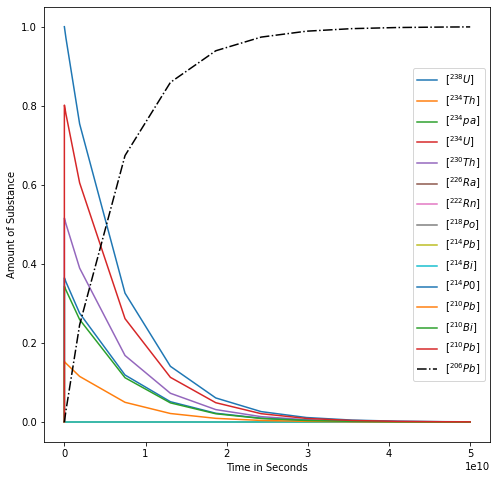

In [112]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import solve_ivp

# The decay Products of Uranium 238
products = ['238U', '234Th', '234Pa', '234U', '230Th','226Ra', '222Rn', '218Po',  '214Pb', '214Bi', '214Po', '210Pb', '210Bi', '210Po']

k = [1.5e-10, 0.0287, 906.07, 2.8e-6, 9.19e-6, 4.3e-4, 66.63, 1.1e5, 1.3e4, 1.8e4, 1.3e11, 0.0310, 0.138, 1.87]     # Decay Constant

def decay(t, X):
    # Calculating dN/dt for each of the products of Uranium 238

    return ( -k[0] * X[0],                              # 238U
             -k[1] * X[1] + k[0] * X[0],                # 234Th
             -k[2] * X[2] + k[1] * X[1],                # 234Pa
             -k[3] * X[3] + k[2] * X[2],                # 234U
             -k[4] * X[4] + k[3] * X[3],                # 230Th
             -k[5] * X[5] + k[4] * X[4],                # 226Ra
             -k[6] * X[6] + k[5] * X[5],                # 222Rn
             -k[7] * X[7] + k[6] * X[6],                # 218Po
             -k[8] * X[8] + k[7] * X[7],                # 214Pb
             -k[9] * X[9] + k[8] * X[8],                # 214Bi
             -k[10] * X[10] + k[9] * X[9],              # 214Po
             -k[11] * X[11] + k[10] * X[10],            # 210Pb
             -k[12] * X[12] + k[11] * X[11],            # 210Bi
             -k[13] * X[13] + k[12] * X[12]  )          # 210Pb

# Initial conditions: only 238 Uranium is present
X0 = [1,0,0,0,0,0,0,0,0,0,0,0,0,0]

# Integrating Time
tf = 5e10

# Numerical Integration
A = solve_ivp(decay, (0, tf), X0, method='Radau')
t = A.t     # Integration Time 't'
ans = A.y   # Values of the solution at integration time 't'

plt.rcParams["figure.figsize"] = (8,8)

plt.plot(t, ans[0], label='$[{^{238}U}]$')
plt.plot(t, ans[1], label='$[{^{234}Th}]$')
plt.plot(t, ans[2], label='$[{^{234}pa}]$')
plt.plot(t, ans[3], label='$[{^{234}U}]$')
plt.plot(t, ans[4]*10**4.5, label='$[{^{230}Th}]$')
plt.plot(t, ans[5], label='$[{^{226}Ra}]$')
plt.plot(t, ans[6], label='$[{^{222}Rn}]$')
plt.plot(t, ans[7], label='$[{^{218}Po}]$')
plt.plot(t, ans[8], label='$[{^{214}Pb}]$')
plt.plot(t, ans[9], label='$[{^{214}Bi}]$')
plt.plot(t, ans[10]*10**20.5, label='$[{^{214}P0}]$')
plt.plot(t, ans[11]*10**7.5, label='$[{^{210}Pb}]$')
plt.plot(t, ans[12]*10**8.5, label='$[{^{210}Bi}]$')
plt.plot(t, ans[13]*10**10, label='$[{^{210}Pb}]$')

# Analytical Integration
soln = (1 - np.exp(-k[0]*t))     
plt.plot(t, soln, c='k', ls='-.', label='$[{^{206}Pb}]$')

plt.legend()
plt.xlabel('Time in Seconds')
plt.ylabel('Amount of Substance')
plt.show()

Analytically, it makes sense


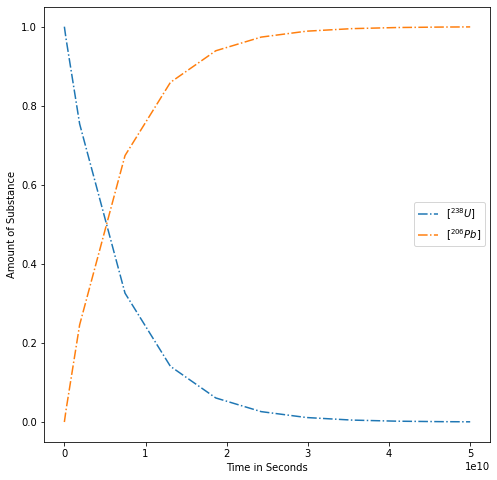

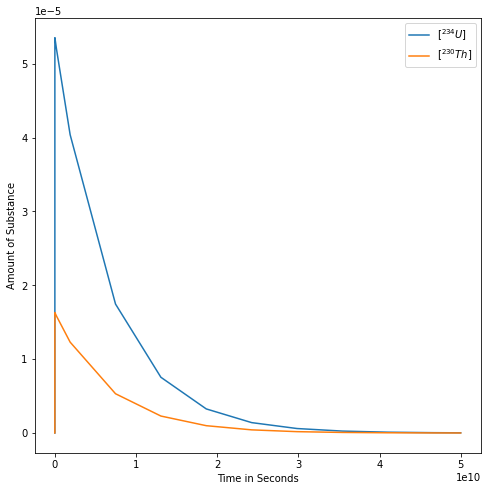

In [121]:
# Plotting the Ratio of Pb206 to U238 as a function of time

# Analytically...

Uranium = np.exp(-k[0]*t)
Plomb = 1 - np.exp(-k[0]*t)  
plt.plot(t, Uranium, ls='-.', label='$[{^{238}U}]$')
plt.plot(t, Plomb, ls='-.', label='$[{^{206}Pb}]$')

print('Analytically, it makes sense')
plt.xlabel('Time in Seconds')
plt.ylabel('Amount of Substance')
plt.legend()
plt.show()

# Plotting the Ratio of Th230 to U234 as a function of time

plt.plot(t, ans[3], label='$[{^{234}U}]$')
plt.plot(t, ans[4], label='$[{^{230}Th}]$')
plt.xlabel('Time in Seconds')
plt.ylabel('Amount of Substance')
plt.legend()
plt.show()

## **Problem 3**

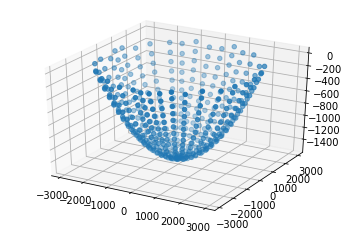

In [63]:
import scipy
import numpy as np
from mpl_toolkits import mplot3d
from matplotlib import pyplot as plt
from scipy.optimize import least_squares
ax = plt.axes(projection='3d')

data = np.loadtxt('/gdrive/My Drive/dish_zenith.txt')

x = data[:,0] # x coordinate
y = data[:,1] # y coordinate
z = data[:,2] # z coornidate

ax.scatter3D(x, y, z, 'gray')

In [64]:
# Method 1 Failure

cons = [1,1,1,1]   # Corresponding to a, x0, y0 ,z0

def fun(x,y,cons):
   return cons[0] * ((x-cons[1])**2 + (y-cons[2])**2) + cons[3]

order = 4
Ax = np.empty([len(x),order])
for i in range(order):
    Ax[:,i] = x**i

Ay = np.empty([len(y),order])
for i in range(order):
    Ay[:,i]=y**i

A = np.hstack((Ax, Ay))
z_true = z

A = np.polynomial.polynomial.polyvander3d(x, y, z, [3,3,3])

lhs=A.T@A
rhs=A.T@z
pp=np.linalg.inv(lhs)@rhs
pred_poly=A@pp

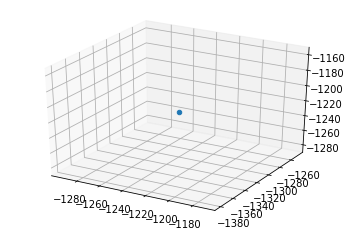

In [19]:
ax2 = plt.axes(projection='3d')
ax2.scatter3D(pred_poly[1], pred_poly[2], pred_poly[3], 'gray')

In [52]:
# Method 2

def z(theta, x, y):
    return theta[3] * (x - theta[0])**2 + (y - theta[1])**2 + theta[2]

xs = data[:,0].tolist()  # x coordinate
ys = data[:,1].tolist()  # y coordinate

gridx, gridy = np.meshgrid(xs, ys)

x0 = 0.1; y0 = -0.15; z0 = 1; a = 2; noise = 0.1
hs = z([x0, y0, z0, a], gridx, gridy)
hs += noise * np.random.default_rng().random(hs.shape)

def fun(theta):
    return (z(theta, gridx, gridy) - hs).flatten()

theta0 = [0, 0, 1, 2]
res = least_squares(fun, theta0)

In [34]:
res

 active_mask: array([0., 0., 0., 0.])
        cost: 94.08899859440032
         fun: array([-0.0213861 , -0.02303855,  0.03574145, ...,  0.04474764,
       -0.00504338, -0.02861871])
        grad: array([-2.08391198e+00, -4.90264334e-01, -2.18807418e-02, -5.21422377e+03])
         jac: array([[-5.70381250e+03,  8.87062500e+02,  1.01189240e+00,
         2.03335334e+06],
       [-5.12790625e+03,  8.87062500e+02,  1.01189240e+00,
         1.64346247e+06],
       [-4.39456250e+03,  8.87062500e+02,  1.01189240e+00,
         1.20701205e+06],
       ...,
       [ 3.06903809e+02, -2.93000000e+02,  9.99801774e-01,
         5.88687891e+03],
       [ 3.87063965e+02, -2.93000000e+02,  9.99801774e-01,
         9.36365869e+03],
       [ 3.28125000e-01, -2.93000000e+02,  1.00003429e+00,
         6.71386719e-03]])
     message: '`ftol` termination condition is satisfied.'
        nfev: 7
        njev: 7
  optimality: 5214.223770236272
      status: 2
     success: True
           x: array([ 0.09999999,

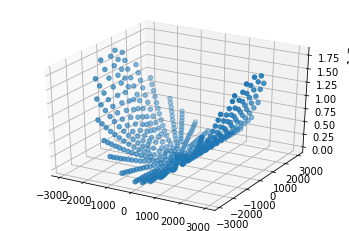

In [49]:
ax3 = plt.axes(projection='3d')
ax3.scatter3D(x,y,hs[0], 'gray')